In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def load_img():
    blank_img = np.zeros((600,600)) # Siyah bir resim oluşturduk
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300),fontFace=font,fontScale=5,color=(255,255,255),thickness=25)
    return blank_img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

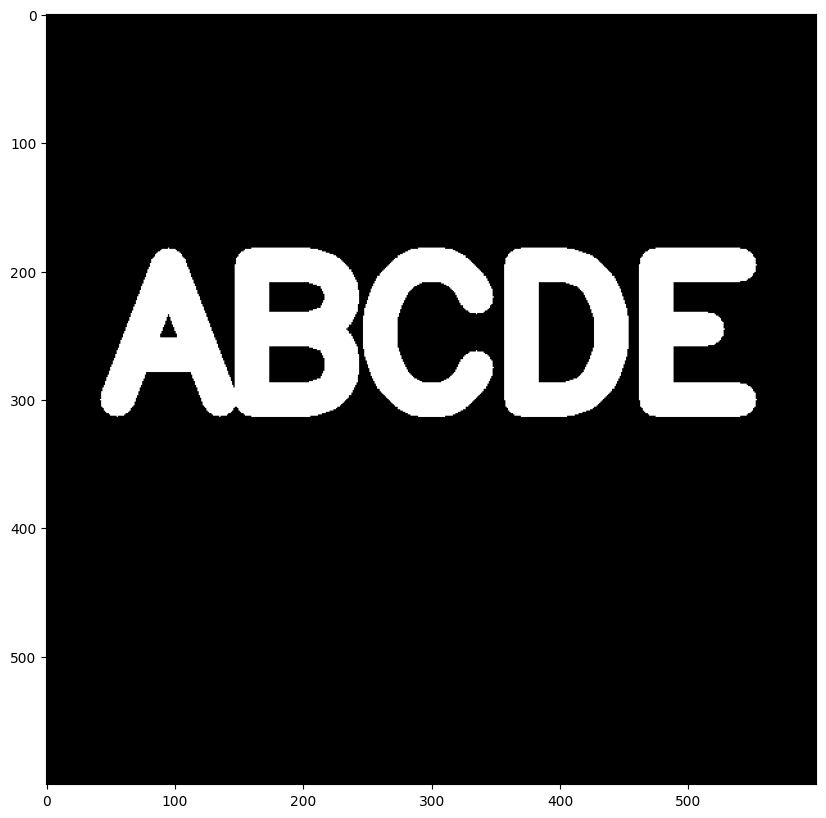

In [4]:
img=load_img()
display_img(img)

In [5]:
kernel= np.ones((5,5),dtype=np.uint8) # 5x5 lik bir matris oluşturduk

In [6]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [11]:
result = cv2.erode(img,kernel,iterations=4) # Erozyon işlemi. iterasyon sayısı işlemin kaç kere yapılacağını belirttir 

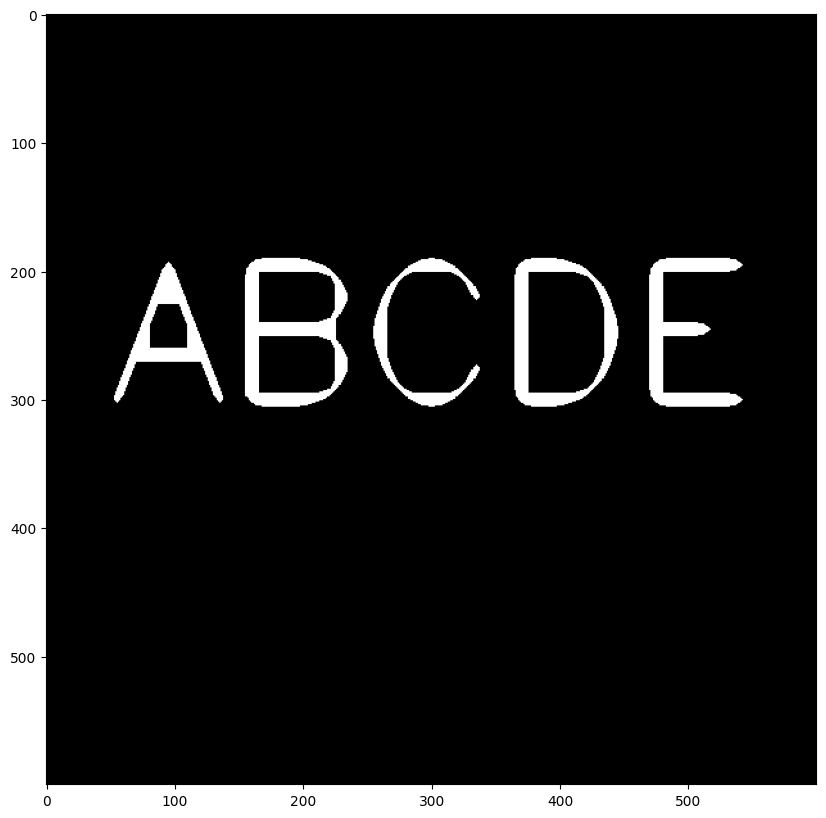

In [12]:
display_img(result)

In [13]:
img = load_img()

In [16]:
white_noise=np.random.randint(low=0,high=2,size=(600,600)) # 0 ve 1 arasında rastgele sayılar üretir gürültü ekliyoruz

In [17]:
white_noise

array([[1, 1, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 1]])

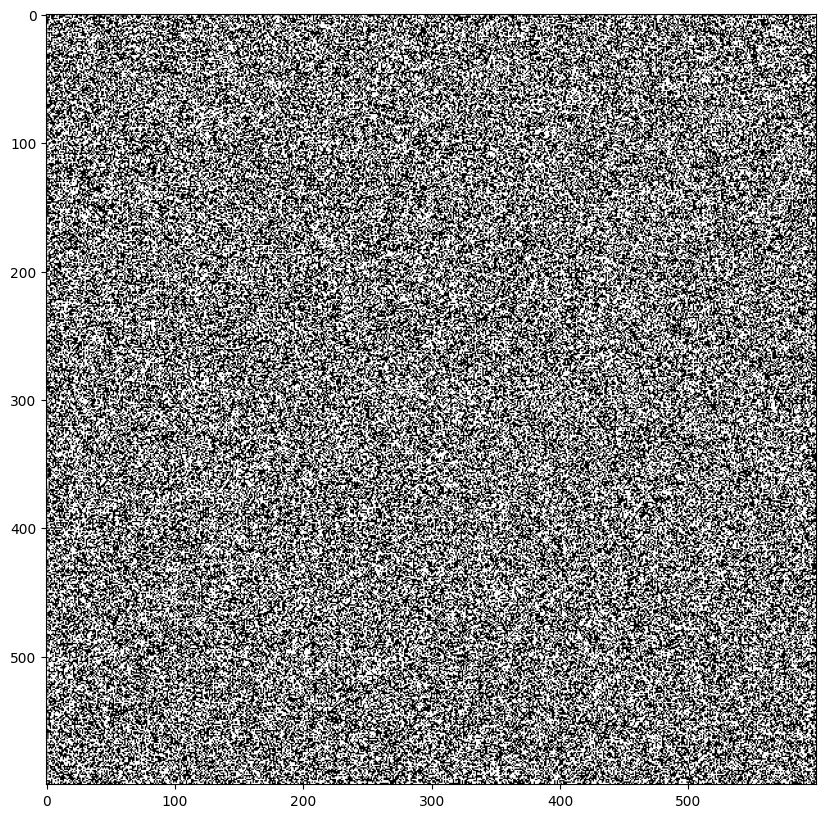

In [18]:
display_img(white_noise)

In [19]:
img.max()

255.0

In [20]:
white_noise=white_noise*255

In [21]:
white_noise

array([[255, 255,   0, ..., 255, 255, 255],
       [  0, 255,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0, 255],
       [255, 255,   0, ..., 255,   0,   0],
       [255,   0,   0, ...,   0,   0, 255]])

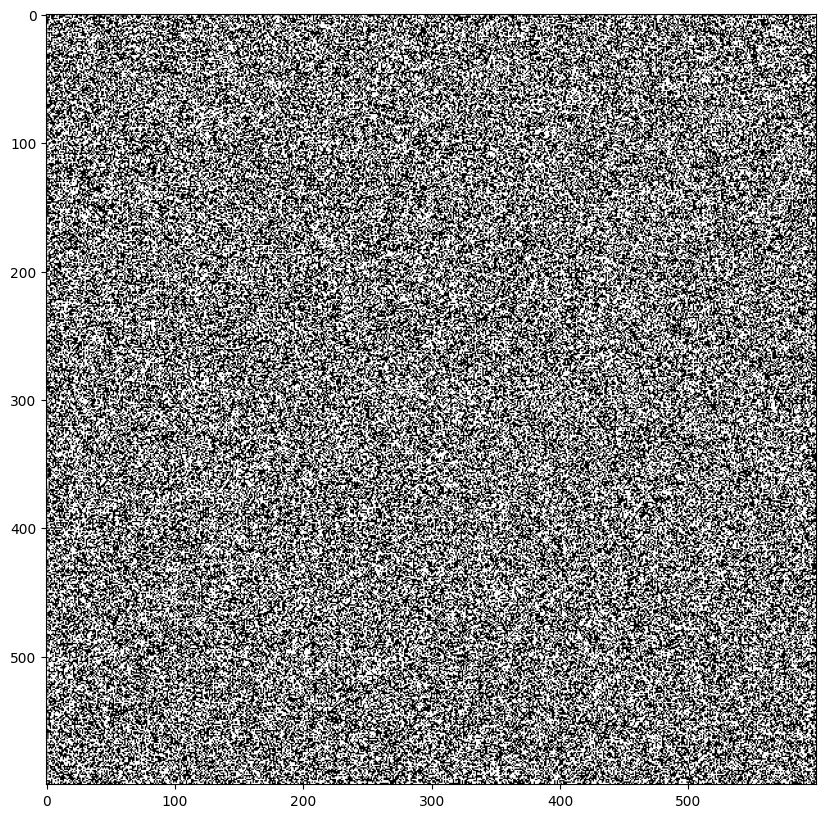

In [22]:
display_img(white_noise)

In [23]:
noise_img = white_noise+img # Gürültülü resim oluşturduğumuz gürültü il resmimizi birleştiriyoruz

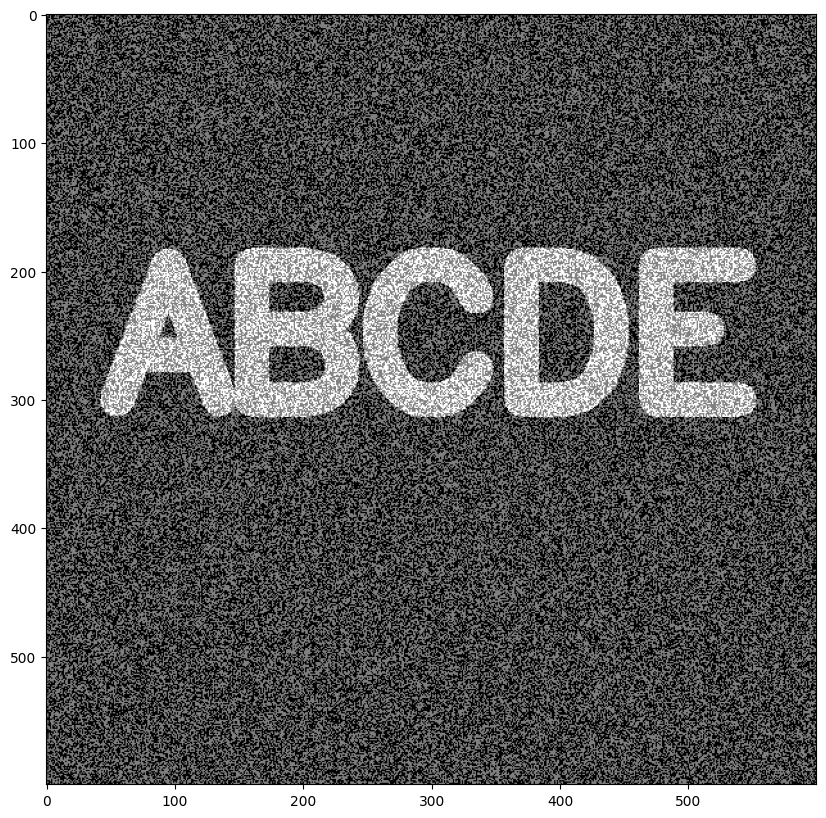

In [24]:
display_img(noise_img)

In [25]:
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel) # Açma işlemi gürültüyü azaltır 
# Açma işlemi erozyon işlemi ardından genişleme işlemi yapar
# morphologyEx fonksiyonu ile açma işlemi yapabiliriz açma işlemi için MORPH_OPEN kullanılır 
# MORPH_CLOSE ise kapatma işlemi için kullanılır
# MORPH_OPEN = EROZYON + GENİŞLEME sağlar

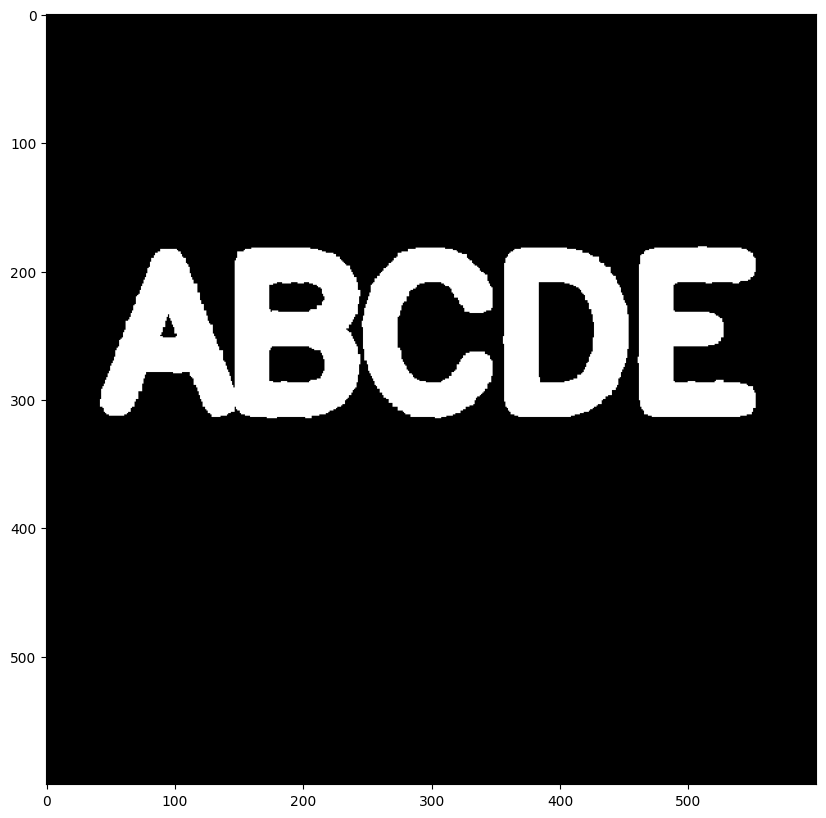

In [26]:
display_img(opening)

# HARFLERE GÜRÜLTÜ UYGULAMA VE GİDERME

In [27]:
img = load_img()

In [28]:
black_noise =np.random.randint(0,2,size=(600,600)) # 0 ve 2 arasında(2 dahil değil) 3x3 lük bir matris oluşturur

In [29]:
black_noise

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 1, 0]])

In [30]:
black_noise = black_noise * -255 # Matrisin elemanlarını -255 ile çarpıyoruz çünkü resim siyah beyaz olduğu için 0 ve 1 değerleri var

In [31]:
black_noise_img = img + black_noise # Gürültülü resim oluşturuyoruz

In [32]:
black_noise_img

array([[-255., -255.,    0., ...,    0.,    0.,    0.],
       [   0., -255.,    0., ..., -255.,    0., -255.],
       [-255., -255., -255., ..., -255., -255.,    0.],
       ...,
       [-255., -255., -255., ..., -255.,    0.,    0.],
       [-255.,    0., -255., ..., -255., -255.,    0.],
       [   0., -255.,    0., ..., -255., -255.,    0.]])

In [33]:
black_noise_img[black_noise_img==-255]=0 # -255 olan değerleri 0 yapıyoruz gürültünün sadece harfler içinde olmasını istiyoruz

In [35]:
black_noise_img.min() # -255 değerini kontrol ediyoruz 0 yapmışız

0.0

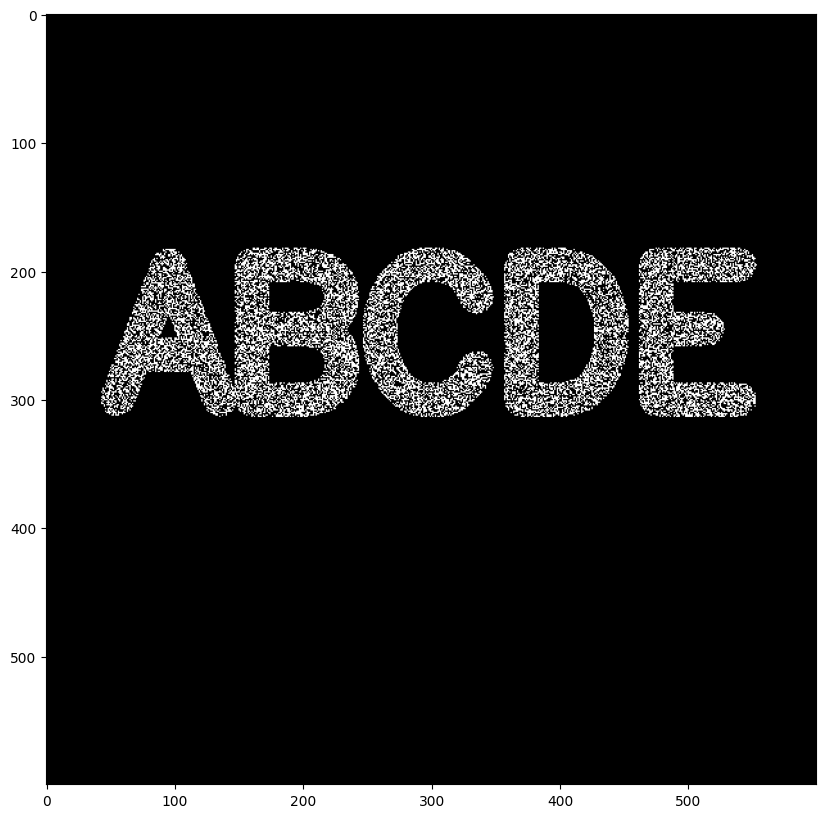

In [36]:
display_img(black_noise_img)

In [37]:
closing=cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel) # Kapatma işlemi gürültüyü azaltır

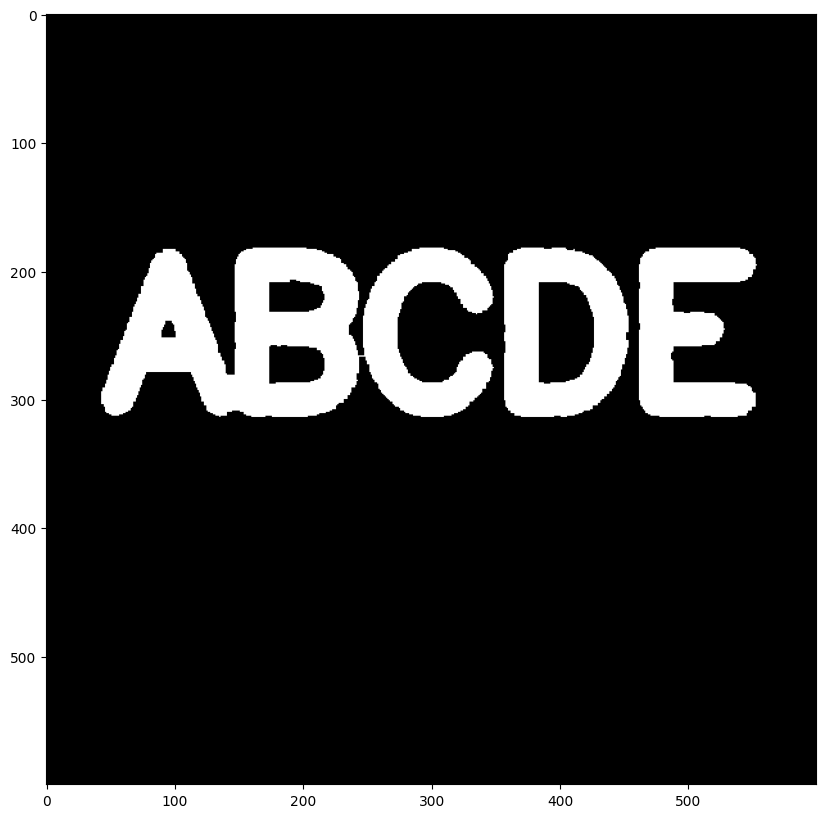

In [38]:
display_img(closing)

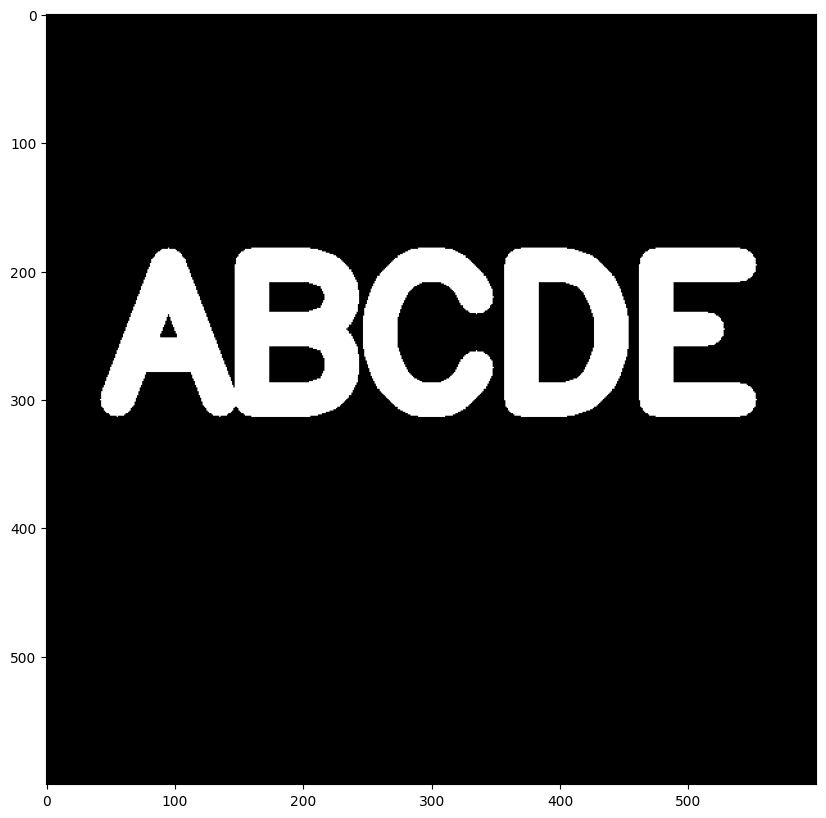

In [39]:
img = load_img()
display_img(img)

In [40]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel) # Genişleme ve erozyon işlemlerinin farkıdır

In [41]:
display_img(gradient)